In [1]:
## bring in needed mods
import pandas as pd, numpy as np
from matplotlib import pyplot as plt, rc
%matplotlib inline

In [2]:
## Set genotype path and bring in data
gpath = '../DATA/GENOTYPE/CDx-ill-SNP-INDEL-df-104-blocked.csv.gz'
gv = pd.read_csv(gpath)

In [3]:
## What is the log base 2 read depth?
np.log2(np.mean(gv.Dp/127))

6.084904500369855

## Gather the unique blocks
#blocks = gv.Block.drop_duplicates().tolist()

In [4]:
## Group the genotype by block; how many are there?
blocked = [a for a in gv.groupby(['Chrom','Block'])]
len(blocked)

3108

In [5]:
## Print the list of chromosomes
chrlist = gv.Chrom.unique()
print(chrlist)

['Chr01' 'Chr02' 'Chr03' 'Chr04' 'Chr05' 'Chr06' 'Chr07' 'Chr08' 'Chr09'
 'Chr10' 'Chr11' 'Chr12' 'Chr13' 'Chr14']


In [6]:
## Calculcate the bin sizes
bsizes = np.array([np.array([b[1].Pos.max() - b[1].Pos.min() 
                             for b in gv[(gv.Chrom==c)].groupby('Block')])
                   for c in chrlist])

/home/croth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [7]:
## What is the max and min kb/cM across the chromosomes
np.max([np.mean(b) for b in bsizes]),np.min([np.mean(b) for b in bsizes])

(6342.359223300971, 4384.811881188119)

In [8]:
## From our 2018 paper, 
## We predicted an average 5.4 kb/cM, 
## with a max and min of 6.3 and 4.4 kb/cM, 
## respectively, across the 14 chromosomes.
## Here lets check in these we have an average:
np.mean(np.concatenate(bsizes))/1000

5.367804054054054

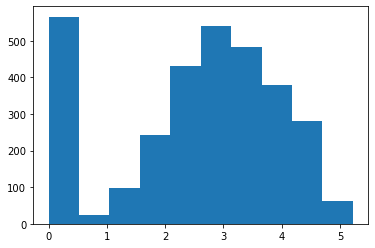

In [9]:
## Plot a histograam of hte log10 bin sizes
plt.hist(np.log10(np.concatenate(bsizes)+1));

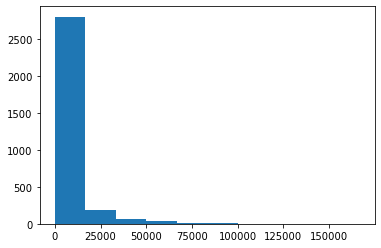

In [10]:
## Show histogram just bin sizes
plt.hist(np.concatenate(bsizes));

In [11]:
## Where is the block column in the list of columns?
block_ix = gv.columns.tolist().index('Block')
block_ix

20

In [12]:
## Calculate the allele frequencies
## Do this for the segregants, set the number of parental strains
nparents = 3
gv['AF'] = (gv[gv.columns.tolist()[block_ix+1:]].sum(axis=1)-1)/(len(gv.columns.tolist()[block_ix+1:])-nparents)

In [13]:
## View the head
gv['AF'].head()

0    0.445545
1    0.445545
2    0.445545
3    0.445545
4    0.445545
Name: AF, dtype: float64

In [14]:
## Bring in the centromere locations
centlocs = pd.read_csv('../DATA/XL280-centromere-locs.csv',
                       index_col=0)
centlocs.columns = ['v','w']
centlocs

,v,w
Chr01,937505,998062
Chr02,855280,905374
Chr03,801551,911882
Chr04,217000,278992
Chr05,777789,854398
Chr06,864013,938913
Chr07,882637,911994
Chr08,706110,761065
Chr09,323968,388527
Chr10,802373,882178


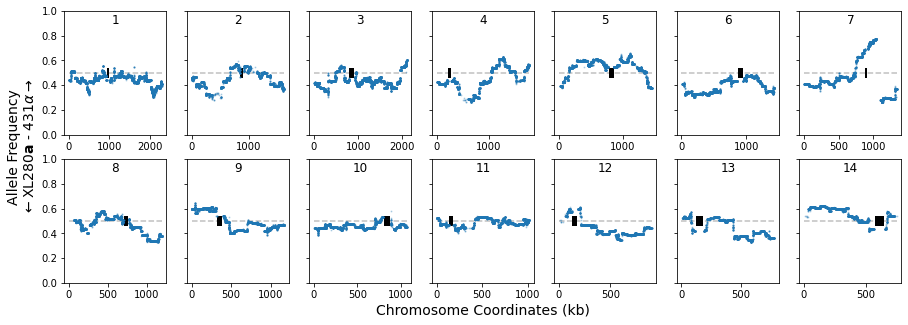

In [15]:
## Make supplementary figure 1
fig,ax = plt.subplots(2,7,figsize=(15,5),sharey=True);
for chrom in chrlist:
    i = int(chrom[-2:])-1
    plt.sca(ax.ravel()[i])
    temp = gv[(gv.Chrom==chrom)]
    plt.hlines(0.5,0,temp.Pos.max()/1000,
               linestyle='--',color='grey',alpha=0.5)
    plt.plot(temp.Pos/1000,temp.AF,'.',alpha=0.25,ms=2);
    
    plt.title(str(i+1),y=0.85,x=0.5);
    plt.hlines(0.5,*centlocs.T[chrom].T[['v','w']].values/1000,
               'k',linewidth=10)
plt.ylim(0,1);
plt.sca(ax[0,0]);
plt.ylabel('Allele Frequency\n'+r'$\leftarrow$' + r'XL280$\bf{a}$ - 431'  + r'$\alpha\rightarrow$',
                            fontsize=14,y=-0.1);
plt.sca(ax[-1,3]);
plt.xlabel('Chromosome Coordinates (kb)',fontsize=14);
plt.savefig('../FIGURES/SUPP/PDFs/S1_Fig.pdf',
            dpi=300,bbox_inches='tight');

In [16]:
## What are the minor allele frequencies?
gv.AF.min(),1-gv.AF.max()

(0.26732673267326734, 0.2277227722772277)